# Data Preprocessing Tools

## Importing the libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [10]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values #rows first (All) and then columns (all except the last one)
y = dataset.iloc[:, -1].values

print(X)
print(y)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Taking care of missing data

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [15]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


#### Another case from the exercise (with identifying missing data)

In [21]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
# Load the dataset
df = pd.read_csv('pima-indians-diabetes.csv')


# Identify missing data (assumes that missing data is represented as NaN)
missing_data = df.isnull().sum()
# Print the number of missing entries in each column
print("Missing data: \n", missing_data)


# Configure an instance of the SimpleImputer class
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
# Fit the imputer on the DataFrame
imputer.fit(df)
# Apply the transform to the DataFrame
df_imputed = imputer.transform(df)
#Print your updated matrix of features
print("Updated matrix of features: \n", df_imputed)

Missing data: 
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Updated matrix of features: 
 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


This is the output of the ".isnull()" function from pandas:
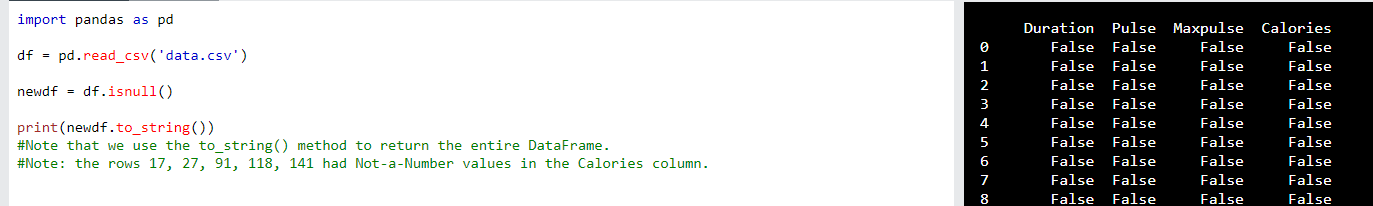

This is the output of the ".isnull()" function combined with the "sum()" from pandas:
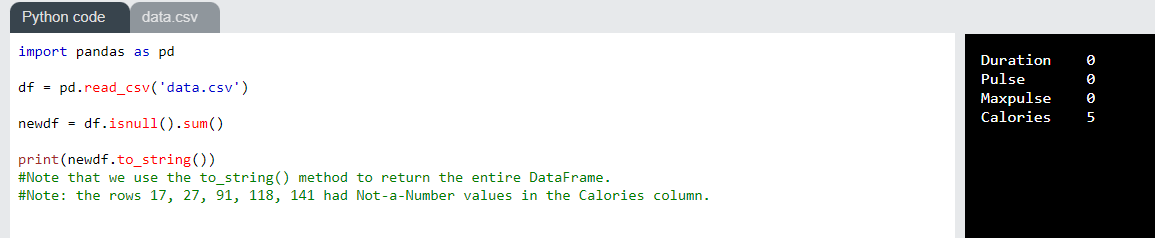

## Encoding categorical data

### Encoding the Independent Variable

In [16]:
# OneHotEncoding is used because countries are not ordered or have comparable values to each other.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#passthrough will allow the passthrough of other columns, without this the code will only pass the transformed columns for the 'Country' column.
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
#Foruce the output to be numpy array for the future training fitting purposes.
X = np.array(ct.fit_transform(X))

In [17]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Encoding the Dependent Variable

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [19]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


#### Another case from the exercise

In [27]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('titanic.csv')

# Identify the categorical data
categorical_features = ['Sex', 'Embarked', 'Pclass']

# Implement an instance of the ColumnTransformer class
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)], remainder = 'passthrough')

# Apply the fit_transform method on the instance of ColumnTransformer
# Convert the output into a NumPy array
X = np.array(ct.fit_transform(df))
# df.drop(columns=['Survived']) for the original "df" will also work, it basically remove the dependent variable to ensure the result it absolutly correct.

# Use LabelEncoder to encode binary categorical data
le = LabelEncoder()
y = le.fit_transform(df['Survived'])

# Print the updated matrix of features and the dependent variable vector
print(X)
print(y)


[[1.0 0.0 1.0 ... 'PC 17599' 71.2833 'C85']
 [1.0 0.0 0.0 ... '113803' 53.1 'C123']
 [0.0 1.0 0.0 ... '17463' 51.8625 'E46']
 ...
 [1.0 0.0 1.0 ... '11767' 83.1583 'C50']
 [1.0 0.0 0.0 ... '112053' 30.0 'B42']
 [0.0 1.0 1.0 ... '111369' 30.0 'C148']]
[1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1
 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1
 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1]


## Splitting the dataset into the Training set and Test set

## Feature Scaling